In [57]:
import blackhc.notebook

In [58]:
import recover_model
import al_notebook.results_loader as rl
import al_notebook.show_batch as sb
import prettyprinter as pp
import al_notebook.plots as alp

In [59]:
import glob
import os

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
def get_labels(dataset, indices):
    return [dataset[index][1] for index in indices]


In [62]:
from dataclasses import dataclass

@dataclass
class Entropies:
    entropies: list
    step_entropies: list

In [63]:
def get_bins(labels, num_classes=10):
    buckets, count = np.unique(labels, return_counts=True)
    density = count
    
    #print('\n'.join(f'{l}: {c} ({d})' for l, c, d in zip(buckets, count, density)))
    
    bars = [0]*num_classes
    for index, d in zip(buckets, density):
       bars[index] = d
    
    return bars

def plot_categories_counts(labels, num_classes=10, axes=None):
    buckets, count = np.unique(labels, return_counts=True)
    density = count 
    
    #print('\n'.join(f'{l}: {c} ({d})' for l, c, d in zip(buckets, count, density)))
    
    bars = [0]*num_classes
    for index, d in zip(buckets, density):
       bars[index] = d
    
    axes.set_ylabel('Acquisition count')
    axes.set_xlabel('Label')
    axes.bar(list(range(num_classes)), bars, tick_label=list(range(num_classes)))


def get_label_entropy(labels):
    buckets, count = np.unique(labels, return_counts=True)
    density = count / len(labels)
    entropy = -np.sum(density * np.log(density), axis=0)
    return entropy

In [64]:
def compute_acquisition_entropies(dataset, samples):
    labels = []
    entropies = []
    step_entropies = []
    for i, samples_i in enumerate(samples):
        if len(samples_i) > 0:
            labels.extend(get_labels(dataset, samples_i))
            step_entropies.append(get_label_entropy(samples_i))
        else:
            step_entropies.append(0)
            
        entropies.append(get_label_entropy(labels))        
        
    #return Entropies(entropies, step_entropies)
    return entropies

In [65]:
np.sum(np.asarray(0)*np.log(np.asarray(0)))

/home/blackhc/anaconda3/envs/active_learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/blackhc/anaconda3/envs/active_learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


nan

In [66]:
plt.close('all')

In [67]:
%ls ./laaos_results/emnist_bbb/

emnist_independent_bald_k10_218487.py  emnist_multibald_bald_k100_706460.py
emnist_independent_bald_k10_335690.py  emnist_multibald_bald_k100_728719.py
emnist_independent_bald_k10_629535.py  emnist_multibald_bald_k100_779382.py
emnist_independent_bald_k10_706460.py  emnist_multibald_bald_k10_218487.py
emnist_independent_bald_k10_728719.py  emnist_multibald_bald_k10_335690.py
emnist_independent_bald_k10_779382.py  emnist_multibald_bald_k10_629535.py
emnist_multibald_bald_k100_218487.py   emnist_multibald_bald_k10_706460.py
emnist_multibald_bald_k100_335690.py   emnist_multibald_bald_k10_728719.py
emnist_multibald_bald_k100_629535.py   emnist_multibald_bald_k10_779382.py


In [68]:
%ls ./laaos_results/emnist_balanaced_random/

emnist_balanced_independent_random_k10_b5_107646.py
emnist_balanced_independent_random_k10_b5_129113.py
emnist_balanced_independent_random_k10_b5_267494.py
emnist_balanced_independent_random_k10_b5_482739.py
emnist_balanced_independent_random_k10_b5_507556.py
emnist_balanced_independent_random_k10_b5_67927.py


In [69]:
import os

In [70]:
batchbalds = list(map(lambda p: "emnist_bbb/" + os.path.basename(p), glob.glob('./laaos_results/emnist_bbb/*multibald*.py')))
balds = list(map(lambda p: "emnist_bbb/" + os.path.basename(p), glob.glob('./laaos_results/emnist_bbb/*_independent_bald_*.py')))
randoms = list(map(lambda p: "emnist_balanaced_random/" + os.path.basename(p), glob.glob('./laaos_results/emnist_balanaced_random/*.py')))

In [71]:
balds

['emnist_bbb/emnist_independent_bald_k10_629535.py',
 'emnist_bbb/emnist_independent_bald_k10_218487.py',
 'emnist_bbb/emnist_independent_bald_k10_779382.py',
 'emnist_bbb/emnist_independent_bald_k10_728719.py',
 'emnist_bbb/emnist_independent_bald_k10_335690.py',
 'emnist_bbb/emnist_independent_bald_k10_706460.py']

In [72]:
stores = rl.load_experiment_results('emnist_bbb', 'emnist_balanaced_random')

In [73]:
list(stores.keys())

['emnist_bbb/emnist_multibald_bald_k10_706460.py',
 'emnist_bbb/emnist_multibald_bald_k10_335690.py',
 'emnist_bbb/emnist_multibald_bald_k100_629535.py',
 'emnist_bbb/emnist_independent_bald_k10_629535.py',
 'emnist_bbb/emnist_multibald_bald_k100_335690.py',
 'emnist_bbb/emnist_independent_bald_k10_218487.py',
 'emnist_bbb/emnist_multibald_bald_k10_779382.py',
 'emnist_bbb/emnist_multibald_bald_k10_629535.py',
 'emnist_bbb/emnist_independent_bald_k10_779382.py',
 'emnist_bbb/emnist_independent_bald_k10_728719.py',
 'emnist_bbb/emnist_multibald_bald_k100_706460.py',
 'emnist_bbb/emnist_multibald_bald_k100_779382.py',
 'emnist_bbb/emnist_independent_bald_k10_335690.py',
 'emnist_bbb/emnist_multibald_bald_k10_218487.py',
 'emnist_bbb/emnist_multibald_bald_k100_728719.py',
 'emnist_bbb/emnist_multibald_bald_k100_218487.py',
 'emnist_bbb/emnist_independent_bald_k10_706460.py',
 'emnist_bbb/emnist_multibald_bald_k10_728719.py',
 'emnist_balanaced_random/emnist_balanced_independent_random_k10

In [74]:
pp.pprint(rl.get_any(stores))

al_notebook.results_loader._Result(
    args=al_notebook.results_loader._args(
        name='emnist_multibald_bald_k10_706460',
        available_sample_k=5,
        num_inference_samples=10,
        seed=706460,
        acquisition_method=acquisition_method.AcquisitionMethod.multibald,
        experiment_description='EMNIST with b5 and k10, k100 with both BALD and BatchBALD',
        type=acquisition_functions.AcquisitionFunction.bald,
        batch_size=64,
        scoring_batch_size=512,
        test_batch_size=512,
        validation_set_size=16384,
        early_stopping_patience=3,
        epochs=40,
        epoch_samples=20224,
        target_accuracy=0.85,
        target_num_acquired_samples=300,
        log_interval=20,
        dataset=dataset_enum.DatasetEnum.emnist,
        initial_samples=[],
        experiment_task_id=5,
        experiments_laaos='./experiment_configs/emnist_bbb/configs.py',
        no_cuda=False,
        quickquick=False,
        initial_samples_per_class

In [75]:
emnist_datasource = rl.dataset_enum.DatasetEnum.emnist.get_data_source()

In [76]:
emnist_train = rl.dataset_enum.data.ConcatDataset([emnist_datasource.train_dataset, emnist_datasource.validation_dataset])

In [77]:
def get_entropies(stores, keys):
    entropies = []
    for key in keys:
        store = stores[key]
        samples_i = rl.gather_samples_I(store)
        acq_entropies = compute_acquisition_entropies(emnist_train, samples_i)
        entropies.append(acq_entropies)
    return entropies

np_entropies = np.asarray(get_entropies(stores, balds))

In [78]:
def gather_samples_entropies(dataset, store):
    samples_I = rl.gather_samples_I(store)
    entropies_I = compute_acquisition_entropies(dataset, samples_I)
    return list(zip(samples_I, entropies_I))

In [79]:
def aggregate_entropies(stores, keys, percentiles=None, thresholds=None):
    accuracies_sample_points_T = [
        rl.expand_samples_I_values_I(
            gather_samples_entropies(emnist_train, stores[key]))
        for key in keys
    ]
    return rl.aggregate_values_sample_points_T(accuracies_sample_points_T,
                                                   percentiles=percentiles,
                                                   thresholds=thresholds)

BatchBALD:
90% at [0 0 0]
95% at [0 0 0]
BALD:
90% at [0 0 0]
95% at [0 0 0]


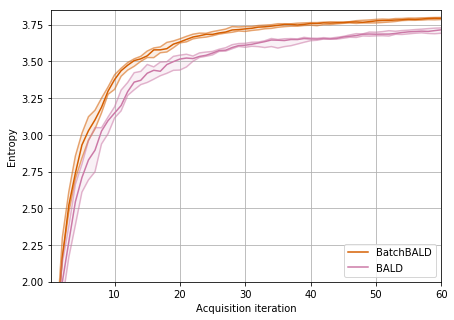

In [84]:
plt.figure(figsize=(7,5))
plt.xlabel('Acquisition iteration')
plt.ylabel('Entropy')
alp.COLOR_ORDER[1], alp.COLOR_ORDER[2] = alp.COLOR_ORDER[2], alp.COLOR_ORDER[1]
alp.plot_aggregated_groups({'BatchBALD': aggregate_entropies(stores, batchbalds), 
                            #'Random': aggregate_entropies(stores, randoms),
                            'BALD': aggregate_entropies(stores, balds)}, show_thresholds=False, show_quantiles=False, show_num_trials=False)
plt.xticks(ticks=list(range(0, 301, 50)), labels=[str(i) for i in range(0, 300//5+1, 10)])
plt.axis([1, 300, 2, 3.85])
plt.grid(True)
plt.legend(loc='lower right')
alp.COLOR_ORDER[1], alp.COLOR_ORDER[2] = alp.COLOR_ORDER[2], alp.COLOR_ORDER[1]

output_path = blackhc.notebook.original_dir + '/entropy_labels_EMNIST.png'
alp.plot_save(output_path, dpi=300)
plt.show()

BatchBALD:
90% at [0 0 0]
95% at [0 0 0]
Random:
90% at [0 0 0]
95% at [0 0 0]
BALD:
90% at [0 0 0]
95% at [0 0 0]


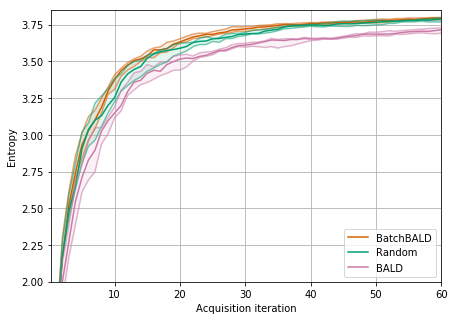

In [81]:
plt.figure(figsize=(7,5))
plt.xlabel('Acquisition iteration')
plt.ylabel('Entropy')
#alp.COLOR_ORDER[1], alp.COLOR_ORDER[2] = alp.COLOR_ORDER[2], alp.COLOR_ORDER[1]
alp.plot_aggregated_groups({'BatchBALD': aggregate_entropies(stores, batchbalds), 'Random': aggregate_entropies(stores, randoms), 'BALD': aggregate_entropies(stores, balds)}, show_thresholds=False, show_quantiles=False, show_num_trials=False)
plt.xticks(ticks=list(range(0, 301, 50)), labels=[str(i) for i in range(0, 300//5+1, 10)])
plt.axis([1, 300, 2, 3.85])
plt.grid(True)
plt.legend(loc='lower right')
#alp.COLOR_ORDER[1], alp.COLOR_ORDER[2] = alp.COLOR_ORDER[2], alp.COLOR_ORDER[1]

output_path = blackhc.notebook.original_dir + '/entropy_labels_EMNIST_w_random.png'
alp.plot_save(output_path, dpi=300)
plt.show()

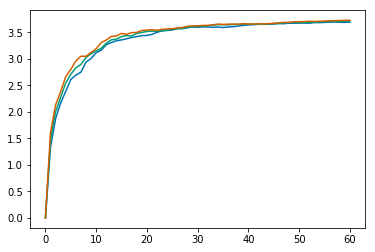

In [82]:
plt.plot(np.percentile(np_entropies, axis=0, q=[25, 50, 75]).T)
plt.show()

In [83]:
rl.aggregate_accuracies_sample_points_T(np_entropies)

AttributeError: module 'al_notebook.results_loader' has no attribute 'aggregate_accuracies_sample_points_T'

In [ ]:
np_entropies.shape

In [ ]:
pp.pprint(rl.gather_samples_I(stores['emnist_bbb/emnist_independent_bald_k10_218487.py']))

In [ ]:
samples_bald = rl.gather_samples_I(stores['emnist_bbb/emnist_independent_bald_k10_706460.py'])

In [ ]:
samples_batchbald = rl.gather_samples_I(stores['emnist_bbb/emnist_multibald_bald_k10_706460.py'])

In [ ]:
samples_random = rl.gather_samples_I(stores['emnist_balanaced_random/emnist_balanced_independent_random_k10_b5_107646.py'])

In [ ]:

bald_labels_I = [[]]
batchbald_labels_I = [[]]

for i, (samples_bald_i, samples_batchbald_i) in enumerate(zip(samples_bald, samples_batchbald)):
    if len(samples_bald_i) == 0:
        continue
    bald_labels_I.append(get_labels(emnist_train, samples_bald_i) + bald_labels_I[-1])
    batchbald_labels_I.append(get_labels(emnist_train, samples_batchbald_i) + batchbald_labels_I[-1])

bald_labels_I.pop(0)
batchbald_labels_I.pop(0)


In [ ]:
random_labels_I = [[]]

for i in range(1, len(samples_random)):
    random_labels_I.append(get_labels(emnist_train, samples_random[i]) + random_labels_I[-1])


random_labels_I.pop(0)


In [ ]:
len(random_labels_I)

In [ ]:
import torch
num_classes=47

In [ ]:
bald_bins = torch.as_tensor(get_bins(bald_labels_I[-2], 47))
random_bins = torch.as_tensor(get_bins(random_labels_I[-2], 47))
batchbald_bins = torch.as_tensor(get_bins(batchbald_labels_I[-2], 47))

In [42]:
sorted_bald_indices = torch.argsort(bald_bins, descending=False)
sorted_batchbald_indices = torch.argsort(batchbald_bins, descending=False)
sorted_random_indices = torch.argsort(random_bins, descending=False)
sorted_indices = torch.argsort(bald_bins + batchbald_bins, descending=True)

permuted_batchbald = batchbald_bins[sorted_batchbald_indices]
permuted_random = random_bins[sorted_random_indices]
permuted_bald = bald_bins[sorted_bald_indices]

In [47]:
permuted_batchbald.numpy().shape

(47,)

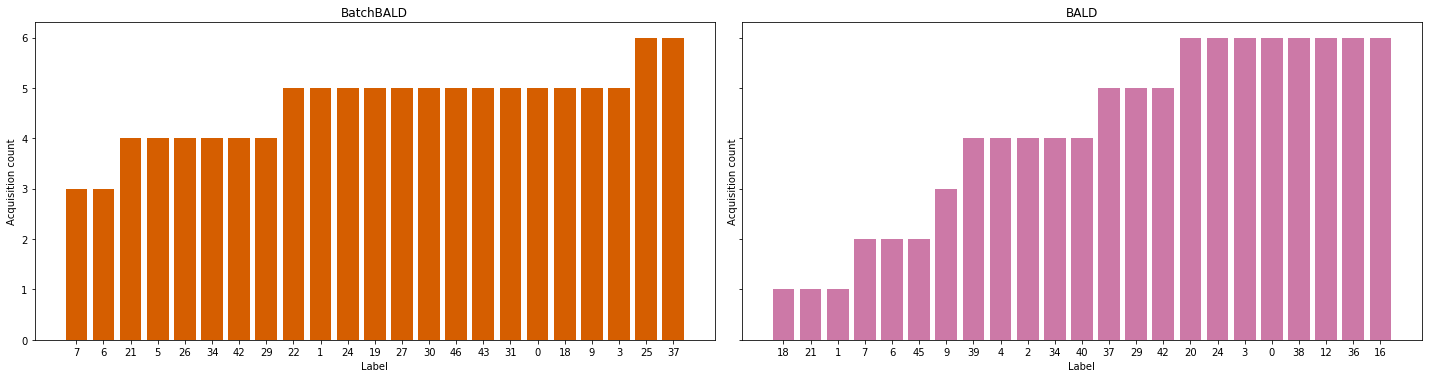

In [56]:
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         squeeze=True,
                         figsize=(20, 5),
                         sharey=True)
plt.tight_layout()
axis = axes[0]
axis.set_title('BatchBALD')
axis.set_ylabel('Acquisition count')
axis.set_xlabel('Label')


def highlight_lower_half(axis,
                         data,
                         indices,
                         alpha,
                         color,
                         show_only_half=False):
    if show_only_half:
        axis.bar(list(range(num_classes // 2)),
                 data[:num_classes // 2],
                 tick_label=list(indices)[:num_classes // 2],
                 color=color,
                 alpha=1)
        return
    axis.bar(list(range(num_classes)),
             data,
             tick_label=list(indices),
             color=color,
             alpha=alpha)
    axis.bar(list(range(num_classes // 2)),
             data[:num_classes // 2],
             color=color,
             alpha=1 - alpha)


highlight_lower_half(axis, permuted_batchbald.numpy(),
                     sorted_batchbald_indices, 0.3, 'C2', show_only_half=True)

# axis = axes[1]
# axis.set_title('Random')
# axis.set_ylabel('Acquisition count')
# axis.set_xlabel('Label')
# axis.bar(list(range(num_classes)), permuted_random.numpy(), tick_label=list(sorted_random_indices), color='C1')

axis = axes[1]
axis.set_title('BALD')
axis.set_ylabel('Acquisition count')
axis.set_xlabel('Label')
highlight_lower_half(axis, permuted_bald.numpy(), sorted_bald_indices, 0.3,
                     'C3', show_only_half=True)

output_path = blackhc.notebook.original_dir + '/histogram_labels_EMNIST.png'
alp.plot_save(output_path, dpi=300)

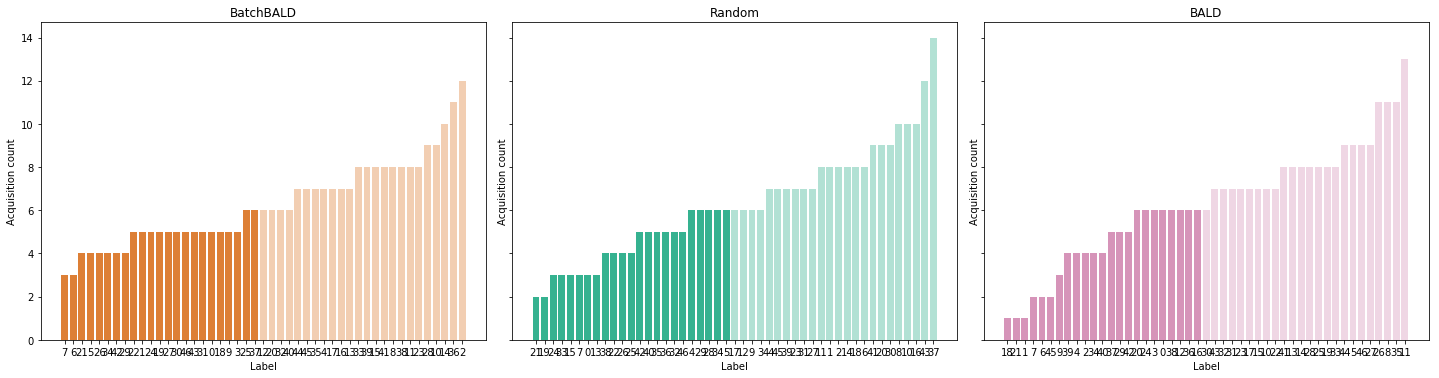

In [55]:
fig, axes= plt.subplots(nrows=1, ncols=3, squeeze=True, figsize=(20,5), sharey=True)
plt.tight_layout()
axis = axes[0]
axis.set_title('BatchBALD')
axis.set_ylabel('Acquisition count')
axis.set_xlabel('Label')
highlight_lower_half(axis, permuted_batchbald.numpy(), sorted_batchbald_indices, 0.3, 'C2')

axis = axes[1]
axis.set_title('Random')
axis.set_ylabel('Acquisition count')
axis.set_xlabel('Label')
highlight_lower_half(axis, permuted_random.numpy(), sorted_random_indices, 0.3, 'C1')

axis = axes[2]
axis.set_title('BALD')
axis.set_ylabel('Acquisition count')
axis.set_xlabel('Label')
highlight_lower_half(axis, permuted_bald.numpy(), sorted_bald_indices, 0.3, 'C3')
    
output_path = blackhc.notebook.original_dir + '/histogram_labels_EMNIST_w_random.png'
alp.plot_save(output_path, dpi=300)

In [34]:
bald_labels = []
batchbald_labels = []

bald_entropies = []
batchbald_entropies = []

bald_step_entropies = []
batchbald_step_entropies = []
for i, (samples_bald_i, samples_batchbald_i) in enumerate(zip(samples_bald, samples_batchbald)):
    if len(samples_bald_i) == 0:
        continue
    bald_labels.extend(get_labels(emnist_train, samples_bald_i))
    batchbald_labels.extend(get_labels(emnist_train, samples_batchbald_i))
    
    bald_step_entropies.append(get_label_entropy(samples_bald_i))
    batchbald_step_entropies.append(get_label_entropy(samples_batchbald_i))
    
    bald_entropies.append(get_label_entropy(bald_labels))
    batchbald_entropies.append(get_label_entropy(batchbald_labels))

In [ ]:
pp.pprint(list(zip(bald_entropies, batchbald_entropies, bald_step_entropies, batchbald_step_entropies)))

In [36]:
print(plt.style.available)

['grayscale', 'seaborn-white', 'classic', 'seaborn', 'seaborn-ticks', 'seaborn-bright', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-poster', 'dark_background', 'seaborn-paper', 'seaborn-colorblind', 'fast', 'seaborn-pastel', 'Solarize_Light2', 'bmh', 'seaborn-deep', 'seaborn-dark-palette', 'seaborn-muted', 'ggplot', 'fivethirtyeight', 'seaborn-talk', 'seaborn-darkgrid', 'tableau-colorblind10', 'seaborn-notebook', '_classic_test']


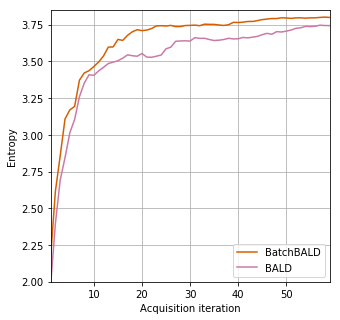

In [37]:
# #plt.title('Entropy of the frequency distribution of the acquired sample labels')
# plt.figure(figsize=(5,5))
# plt.xlabel('Acquisition iteration')
# plt.ylabel('Entropy')
# plt.plot(batchbald_entropies, label='BatchBALD', color='C2')
# plt.plot(bald_entropies, label='BALD', color='C3')
# plt.axis([1, 59, 2, 3.85])
# plt.grid(True)
# plt.legend(loc='lower right')

# output_path = blackhc.notebook.original_dir + '/entropy_labels_EMNIST.png'
# alp.plot_save(output_path, dpi=300)
# plt.show()